In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


In [5]:
df = pd.read_sql_query("""  SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [52]:
df.JobTitle.nunique()

2129

In [7]:
df.shape

(148654, 13)

In [8]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [9]:
df = pd.DataFrame(df)

In [10]:
len(df)

148654

In [11]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


In [12]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

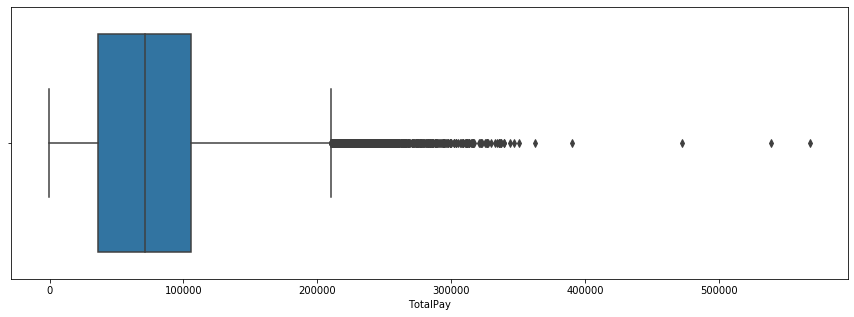

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.TotalPay)
plt.show()

- We can observe some outliers from this boxplot.

In [14]:
IQR=df['TotalPay'].quantile(0.75)-df['TotalPay'].quantile(0.25)
lower_bridge=df['TotalPay'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['TotalPay'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-68336.21499999997
210344.34499999997


(None, None)

In [15]:
len(df.loc[df['TotalPay']<=-68336.21499999997 ,'TotalPay'])

0

In [16]:
len(df.loc[df['TotalPay']>=210344.34499999997,'TotalPay'])

1286

In [17]:
df.drop((df.loc[df['TotalPay']>=210344.34499999997, 'TotalPay']).index, inplace = True)

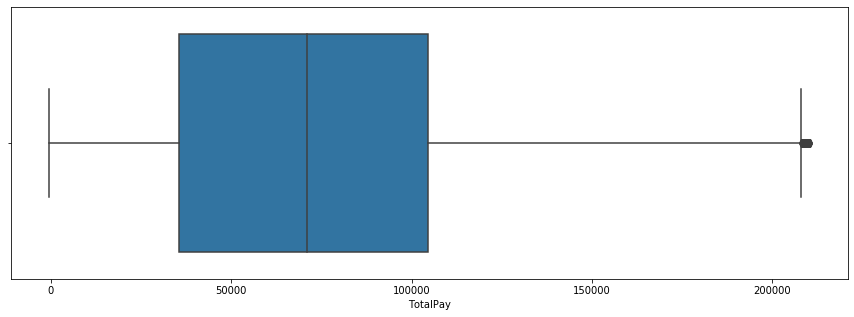

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.TotalPay)
plt.show()

- We can see now there are no outliers present in TotalPay column

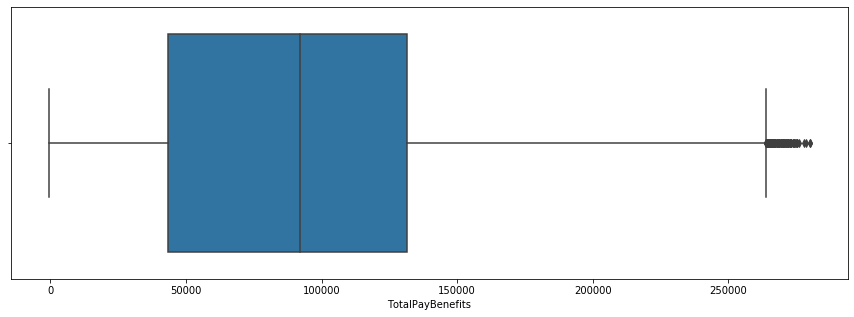

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.TotalPayBenefits)
plt.show()

- We can observe there are many outliers

In [20]:
IQR=df['TotalPayBenefits'].quantile(0.75)-df['TotalPayBenefits'].quantile(0.25)
lower_bridge=df['TotalPayBenefits'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['TotalPayBenefits'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-89107.47875000002
264003.99125


(None, None)

In [21]:
len(df.loc[df['TotalPayBenefits']<=-89150.55000000002 ,'TotalPayBenefits'])

0

In [22]:
len(df.loc[df['TotalPayBenefits']>=266092.65,'TotalPayBenefits'])

74

In [23]:
df.drop((df.loc[df['TotalPayBenefits']>=266092.65, 'TotalPayBenefits']).index, inplace = True)

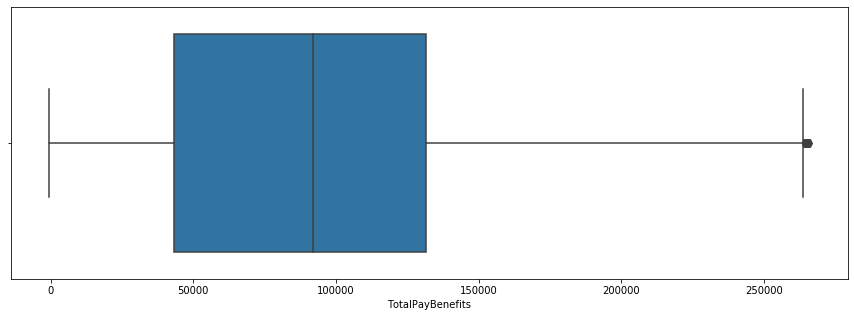

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.TotalPayBenefits)
plt.show()

In [25]:
df['JobTitle'].nunique()

2129

In [26]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [27]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Agency               object
Status               object
dtype: object

In [28]:
# Only one unique value in the Notes variable doesn't show any variation with other variables. So, dropping the variable.
df['Notes'].nunique()

1

In [29]:
# Droping the insignificant variables
df.drop(['Id','Agency','Notes'], axis = 1, inplace = True)

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


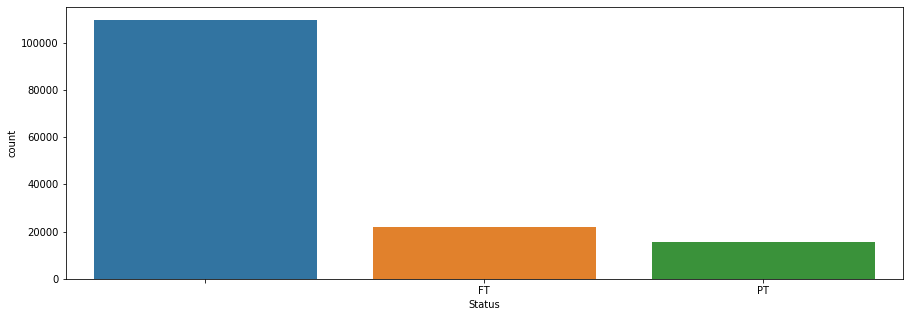

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(df['Status'])

- More than 1 lakh values are empty values in Status variable which doesn't add any value. So,droping the Status variable

In [31]:
#Droping the Status variable
df.drop('Status',axis = 1, inplace = True)

In [32]:
df.Benefits.nunique()

97385

In [33]:
len(df.loc[df['Benefits'] == '','Benefits'])

35996

- Empty spaces in Benefits variable are 36159

In [34]:
df.BasePay.nunique()

108694

In [35]:
df.BasePay.unique()

array([130457.96, 116603.33, 105934.67, ..., 6.04, 15.5, 'Not Provided'],
      dtype=object)

In [36]:
df.loc[df.BasePay == 'Not Provided'] = np.nan

In [37]:
df['BasePay'] = pd.to_numeric(df['BasePay'])

In [38]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                float64
dtype: object

In [39]:
df.fillna(value = df.BasePay.mean(),inplace = True)

In [40]:
df.OvertimePay.unique()

array([6.28461000e+03, 7.85322600e+04, 8.76423300e+04, ...,
       1.02700000e+02, 5.67700000e+01, 6.53708264e+04])

In [41]:
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])

In [42]:
df.Benefits.unique()

array(['', 67439.76, 60723.84, ..., 0.13, 1.24, 65370.82637885701],
      dtype=object)

In [43]:
df.loc[df.Benefits == '','Benefits'] = np.nan

In [44]:
df.fillna(value = df.Benefits.mean(), inplace = True)

### Univariate Analysis

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


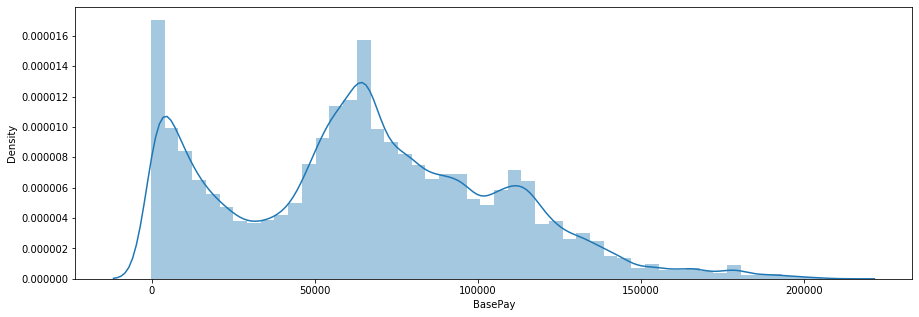

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(df['BasePay'])

- We can observe there are multi modes in BasePay variable

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


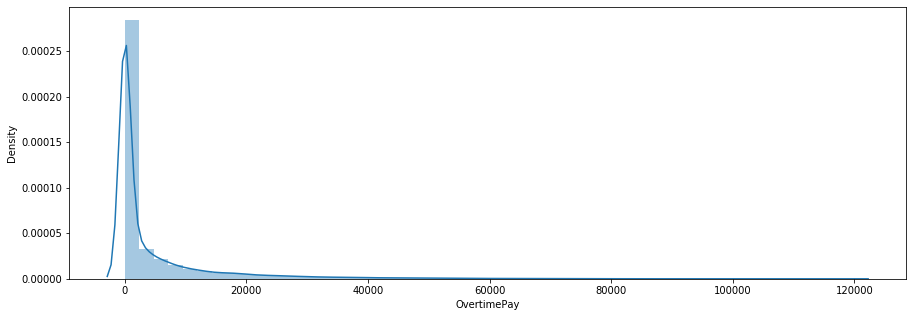

In [46]:
plt.figure(figsize=(15,5))
sns.distplot(df['OvertimePay'])

- Here data is rightly skewed.

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


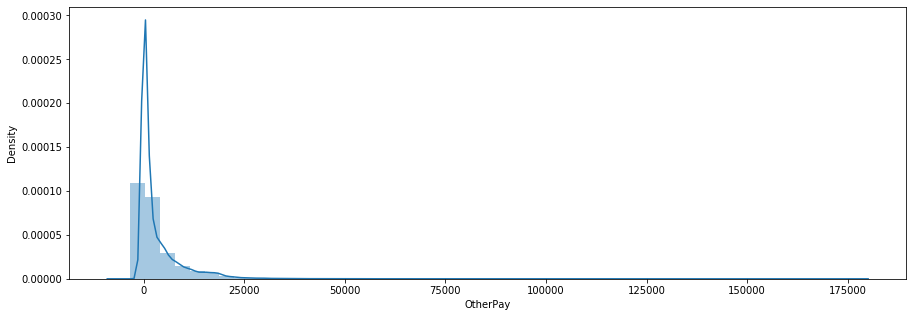

In [47]:
plt.figure(figsize=(15,5))
sns.distplot(df['OtherPay'])

- Plot shows OtherPay variable is rightly skewed. There may be chance of having outliers.

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


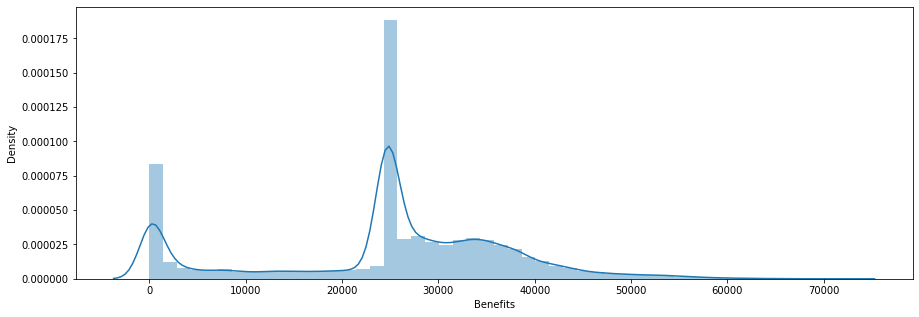

In [48]:
plt.figure(figsize=(15,5))
sns.distplot(df['Benefits'])

- We can see there are multi modes in the Benefits variable.

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


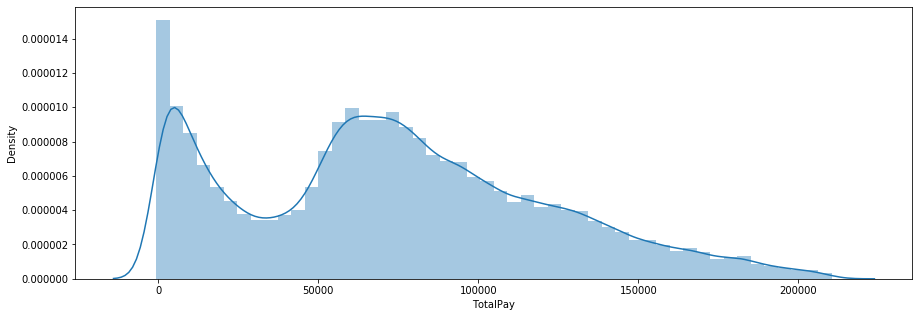

In [49]:
plt.figure(figsize=(15,5))
sns.distplot(df['TotalPay'])

- Plot shows there are multi modes in TotalPay variable and after approximately 70000 the count gradually decreases.

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


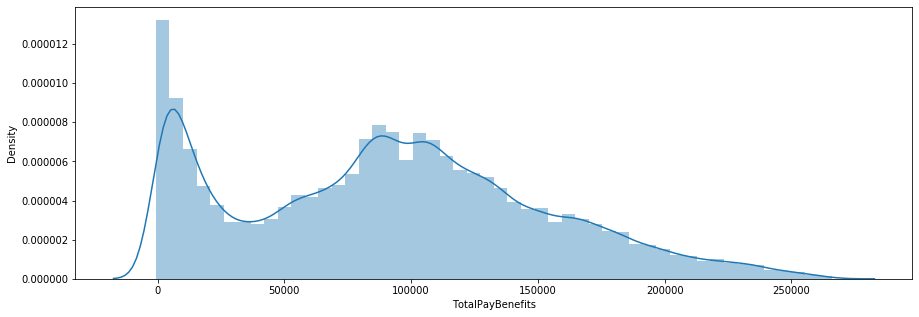

In [50]:
plt.figure(figsize=(15,5))
sns.distplot(df['TotalPayBenefits'])

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


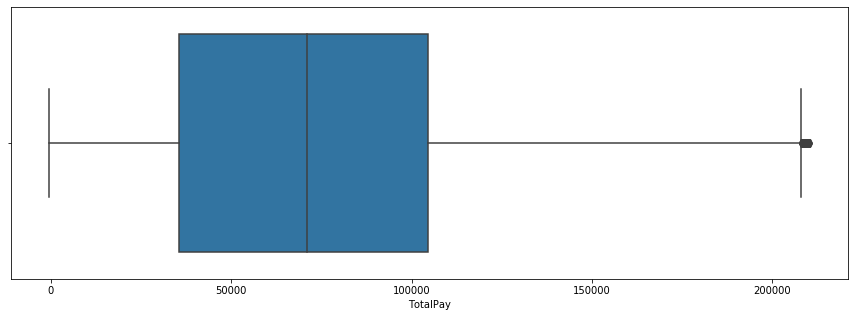

In [158]:
plt.figure(figsize=(15,5))
sns.boxplot(df['TotalPay'])

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


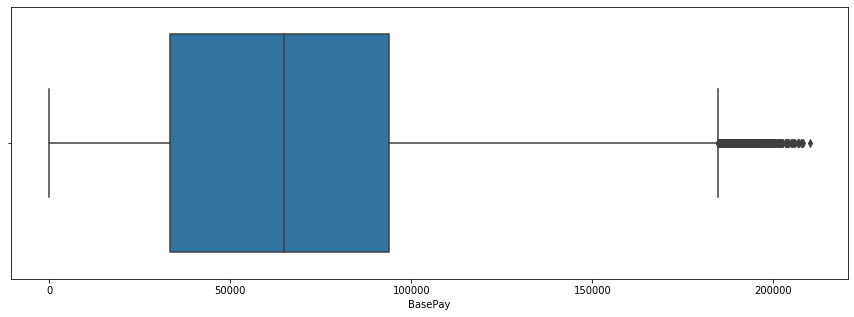

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(df['BasePay'])

In [159]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,147294.000000,147294.000000,147294.000000,147294.000000,147294.000000,147294.000000,147294.000000
mean,65370.826379,4739.215780,3443.634948,24716.321100,73281.620428,91955.942684,2014.240535
std,41442.354137,10222.302619,7052.280737,13185.030031,48212.276264,60297.949541,330.171130
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33259.245000,0.000000,0.000000,22042.320000,35578.727500,43290.482500,2012.000000
50%,64827.030000,0.000000,780.200000,24716.321100,70921.415000,91836.550000,2013.000000
75%,93837.010000,4537.552500,4098.790000,33294.600000,104512.180000,131551.922500,2014.000000
max,210022.040000,119407.700000,178114.800000,71603.130000,210336.280000,265982.980000,65370.826379


C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


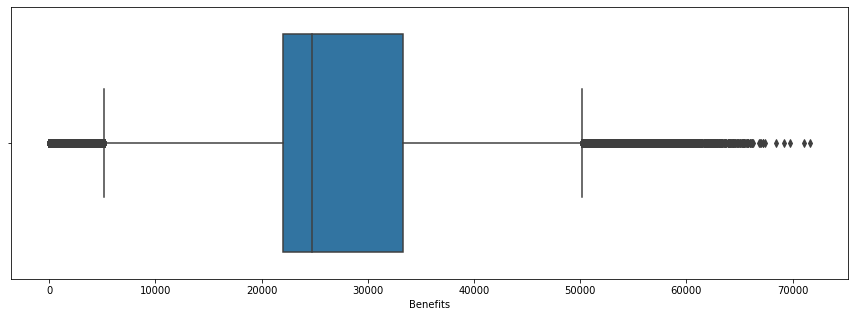

In [161]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Benefits'])

### Bivariate Analysis

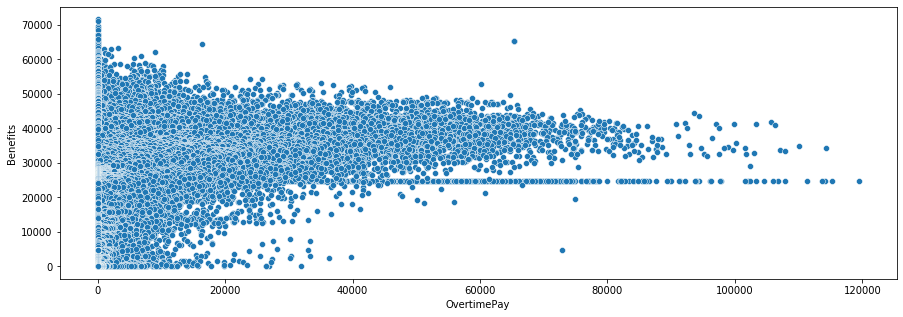

In [57]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['OvertimePay'],y = df['Benefits'])

- We can clearly observe that people tend to work overtime if they are getting benefits more than 2500.
- Also, after benefits more than 2500 as the overtimepay increases benefits increases though.
- Initialy benefits are high.

<Figure size 1080x360 with 0 Axes>

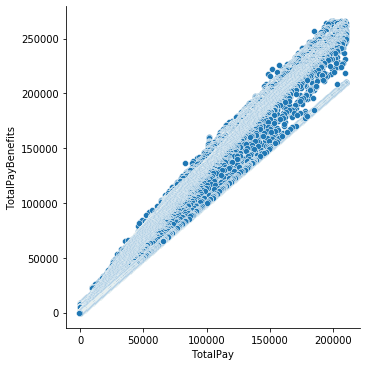

In [164]:
plt.figure(figsize=(15,5))
sns.relplot(x = df['TotalPay'],y = df['TotalPayBenefits'])

- We can clearly observe there is a high correlation between TotalPayBenefits and TotalPay

<Figure size 1080x360 with 0 Axes>

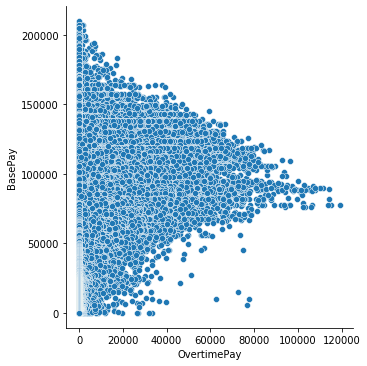

In [165]:
plt.figure(figsize=(15,5))
sns.relplot(x = df['OvertimePay'],y = df['BasePay'])

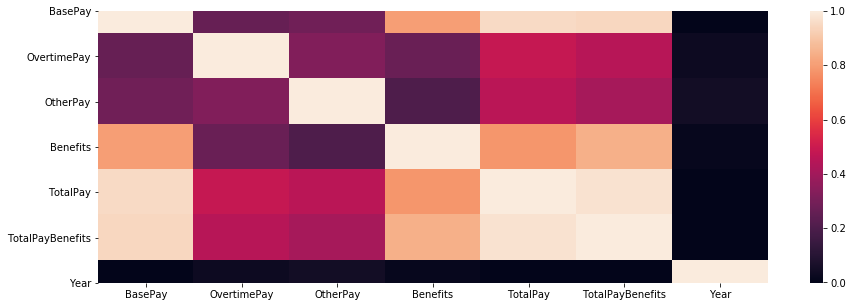

- From this plot we can see there is high correlation between TotalPay and TotalPayBenefits, TotalPay and BasePay, TotalPayBenefits and BasePay.


### Conclusion


From this analysis we can interpret that many people wish to work overtime if they are getting benefits more than 2500. Totalpay is completely dependent on totalpaybenefits and basepay.

In [64]:
df.Year.unique()

array([ 2011.        ,  2012.        ,  2013.        ,  2014.        ,
       65370.82637886])

In [98]:
df.loc[df.Year ==  65370.82637885701, 'Year']

37739

In [101]:
df.drop((df.loc[df['Year']==65370.82637885701, 'Year']).index, inplace = True)

In [103]:
df['Year'] = df['Year'].astype(object)

In [102]:
df.Year.unique()

array([2011.0, 2012.0, 2013.0, 2014.0], dtype=object)

In [88]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                 object
dtype: object

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


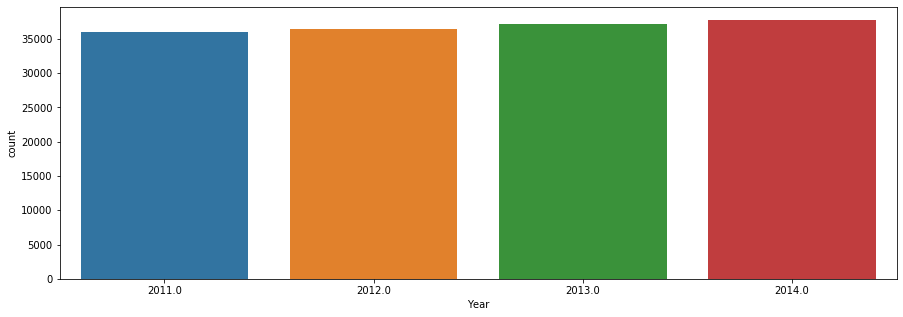

In [104]:
plt.figure(figsize=(15,5))
sns.countplot(df['Year'])

- Almost equal distribution for all years.

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


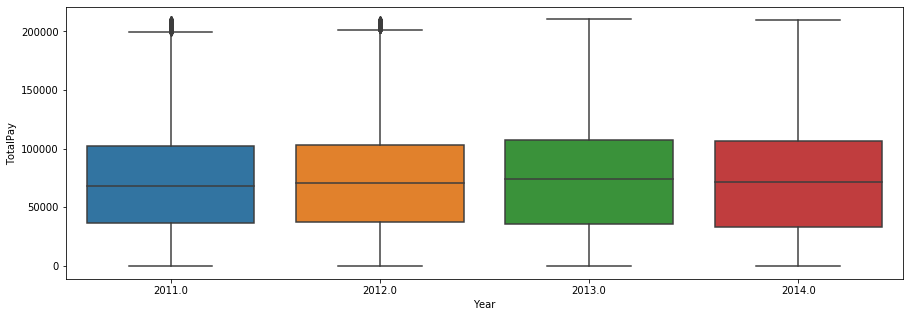

In [105]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Year'],df['TotalPay'])

- The distribution of TotalPay is almost same for all years.
- There are some extreme values for 2011 and 2012.

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df['OvertimePay'],df['Year'])

C:\Users\welcome\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


### Correlation Plot

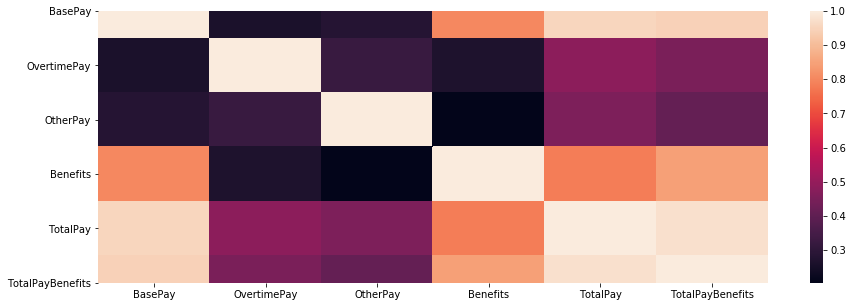

In [106]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr)

### Conclusion


- From this analysis we can interpret that many people wish to work overtime if they are getting benefits more than 2500. Totalpay is completely dependent on totalpaybenefits and basepay.
- The distribution of TotalPay is same for all years.